In [1]:
import pandas as pd
import numpy as np
#our decision is regression
from pycaret.classification import *

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ronnyfahrudin/Medium-Code/main/Pycaret_to_Tkinter/datasets/churn_analysis.csv',sep=',' )

In [3]:
nul = df.isnull().sum().reset_index()
nul.columns = ['feature','sum_nul']
nul

,feature,sum_nul
0,UpdatedAt,0
1,customerID,0
2,gender,0
3,SeniorCitizen,0
4,Partner,0
5,tenure,0
6,PhoneService,0
7,StreamingTV,0
8,InternetService,0
9,PaperlessBilling,0


In [4]:
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [5]:
print('number of rows:', df.shape[0])
print('number of columns:',df.shape[1])

number of rows: 6950
number of columns: 13


# function visualization

In [6]:
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3, 
                      sharex=False, sharey=False, size = 5)
    g = g.map(types, "value")
    plt.show()
    return (g)

In [7]:
# define numeric and categorical columns
num_col = df.describe().columns.tolist()
all_col = df.columns.tolist()
obj_col = [i for i in all_col if i not in num_col]

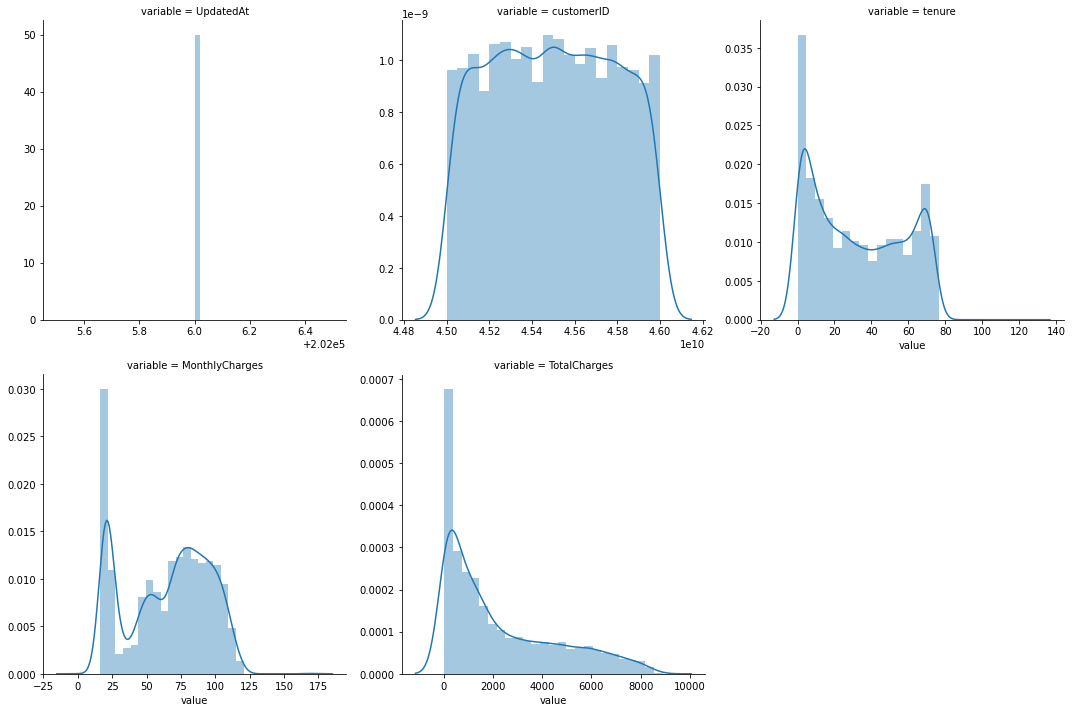

In [8]:
viz(df[num_col],sns.distplot)

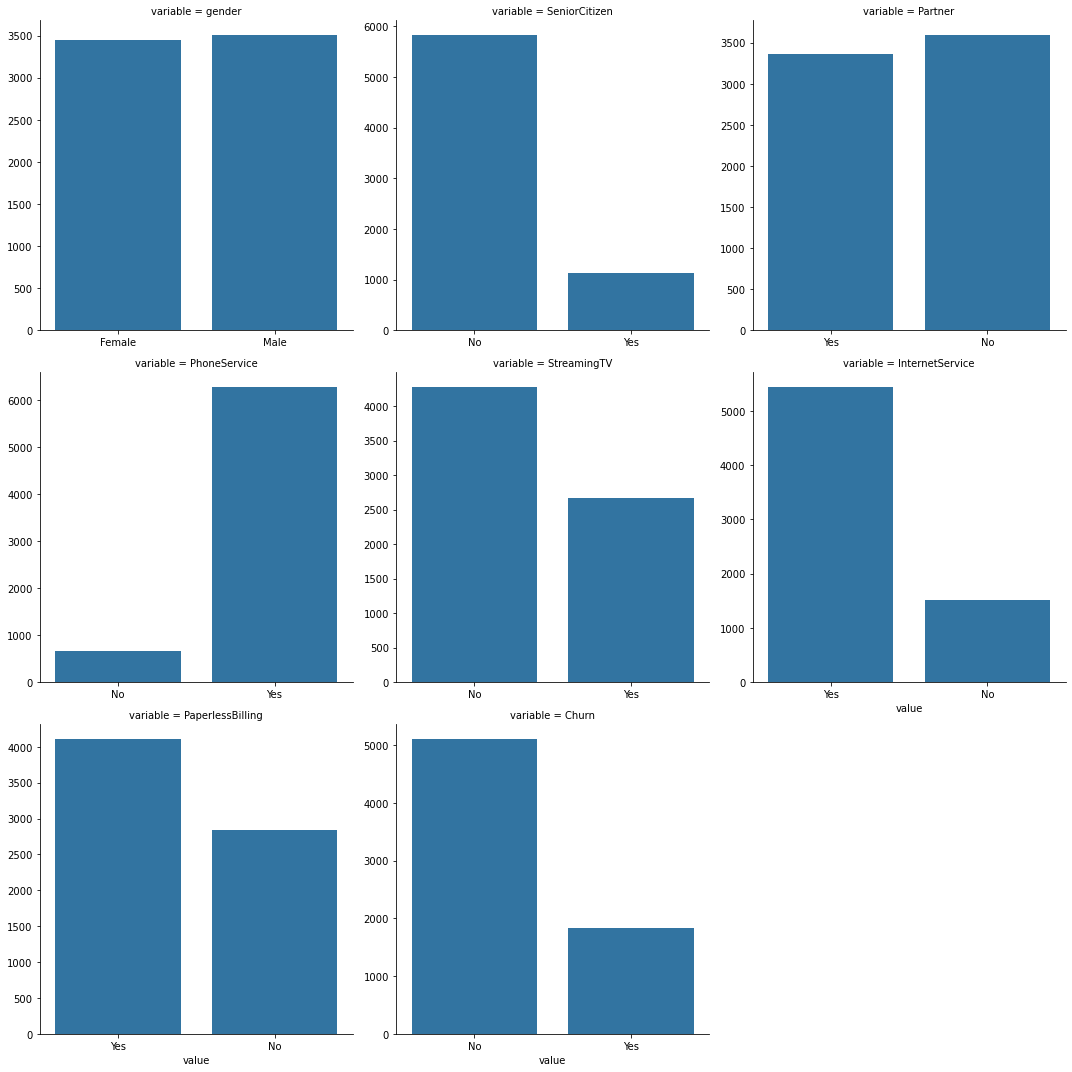

In [9]:
viz(df[obj_col],sns.countplot)

In [10]:
dfs = df.drop(['UpdatedAt','customerID'],1)
# normalize True : default we use zscore to normalize datasets
# fix_imbalance True : default use is 
clas = setup(dfs, target = 'Churn',train_size = 0.7,
           normalize = True, fix_imbalance = True)

,Description,Value
0,session_id,8700
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(6950, 11)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
print(clas)

(StratifiedKFold(n_splits=10, random_state=8700, shuffle=False), 'lightgbm', {'fold_generator', 'imputation_classifier', 'pycaret_globals', 'exp_name_log', 'master_model_container', 'fold_groups_param', 'y', 'X', 'iterative_imputation_iters_param', 'y_train', 'seed', '_internal_pipeline', 'transform_target_param', 'y_test', 'transform_target_method_param', 'html_param', 'gpu_param', 'prep_pipe', 'imputation_regressor', 'X_train', 'fix_imbalance_method_param', 'display_container', 'logging_param', 'fold_shuffle_param', '_available_plots', 'USI', '_all_metrics', '_all_models', '_all_models_internal', 'X_test', 'log_plots_param', 'fold_param', '_ml_usecase', 'target_param', 'n_jobs_param', 'experiment__', 'data_before_preprocess', 'create_model_container', 'stratify_param', 'fix_imbalance_param', '_gpu_n_jobs_param'}, 'clf-default-name', [], None, 0       0
1       0
2       1
3       0
4       0
       ..
6945    0
6946    1
6947    1
6948    0
6949    0
Name: Churn, Length: 6950, dtype:

In [51]:
clas[-32]

1940    1
3179    0
1297    0
4338    0
2141    0
       ..
1644    1
6133    0
3246    1
4062    0
5286    0
Name: Churn, Length: 4864, dtype: int32

In [55]:
X_train = clas[-22]
y_train = clas[-32]
X_test = clas[-12]
y_test = clas[-28]

print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (4864, 10)
y_train shape: (4864,)
X_test shape: (2086, 10)
y_test shape: (2086,)


In [56]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7586,0.8053,0.6619,0.5396,0.5935,0.4246,0.4299,0.4040
catboost,CatBoost Classifier,0.7576,0.8104,0.6674,0.5378,0.5947,0.4248,0.4307,10.5090
xgboost,Extreme Gradient Boosting,0.7514,0.7933,0.6127,0.5298,0.5675,0.3945,0.3972,1.2470
rf,Random Forest Classifier,0.7459,0.7783,0.5865,0.5224,0.5519,0.3756,0.3773,0.8130
gbc,Gradient Boosting Classifier,0.7434,0.8185,0.7213,0.5147,0.6003,0.4193,0.4325,0.7080
ada,Ada Boost Classifier,0.7338,0.8189,0.7359,0.5017,0.5962,0.4083,0.4254,0.2920
et,Extra Trees Classifier,0.7282,0.7470,0.5527,0.4937,0.5203,0.3320,0.3337,0.7390
lr,Logistic Regression,0.7237,0.8132,0.7506,0.4901,0.5925,0.3976,0.4185,1.1700
lda,Linear Discriminant Analysis,0.7214,0.8100,0.7521,0.4872,0.5911,0.3945,0.4160,0.0550
ridge,Ridge Classifier,0.7212,0.0000,0.7521,0.4870,0.5909,0.3942,0.4157,0.0370


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8700, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [66]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7454,0.8332,0.7538,0.5158,0.6125,0.4327,0.4499
1,0.7228,0.8309,0.8000,0.4883,0.6064,0.4112,0.4411
2,0.7454,0.8173,0.7308,0.5163,0.6051,0.4253,0.4393
3,0.7351,0.8258,0.7231,0.5027,0.5931,0.4060,0.4207
4,0.7284,0.8216,0.7308,0.4948,0.5901,0.3980,0.4150
5,0.7469,0.8308,0.6769,0.5207,0.5886,0.4103,0.4177
6,0.7099,0.7999,0.7231,0.4724,0.5714,0.3664,0.3854
7,0.7531,0.8271,0.7615,0.5266,0.6226,0.4481,0.4649
8,0.7181,0.8053,0.7462,0.4826,0.5861,0.3869,0.4081
9,0.7325,0.7975,0.7132,0.4973,0.5860,0.3976,0.4117


In [67]:
predict_model(ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7512,0.8441,0.7728,0.5111,0.6153,0.4425,0.4632


,tenure,MonthlyCharges,TotalCharges,gender_Female,SeniorCitizen_Yes,Partner_Yes,PhoneService_No,StreamingTV_Yes,InternetService_Yes,PaperlessBilling_Yes,Churn,Label,Score
0,-1.157899,-1.319347,-0.972498,1.0,0.0,0.0,0.0,0.0,0.0,1.0,No,No,0.5041
1,-0.709087,0.307543,-0.507986,0.0,1.0,0.0,0.0,0.0,1.0,1.0,Yes,Yes,0.5076
2,-0.260275,-1.512906,-0.790756,1.0,0.0,1.0,0.0,0.0,0.0,0.0,No,No,0.5131
3,-0.994695,0.334241,-0.718537,0.0,0.0,1.0,0.0,0.0,1.0,1.0,No,Yes,0.5052
4,-0.668286,1.048404,-0.310048,1.0,1.0,0.0,0.0,1.0,1.0,1.0,Yes,Yes,0.5126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,1.616577,-1.334365,-0.191453,1.0,0.0,1.0,0.0,0.0,0.0,0.0,No,No,0.5368
2082,-0.709087,0.355933,-0.502344,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Yes,Yes,0.5052
2083,-1.076297,1.106805,-0.758651,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Yes,Yes,0.5109
2084,-0.219474,0.808125,0.045029,1.0,0.0,0.0,0.0,0.0,1.0,1.0,No,Yes,0.5014


In [59]:
ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8700)

# import shap
# shap_values = shap.TreeExplainer(ada).shap_values(X_train)
# shap.summary_plot(shap_values, X_train, plot_type="bar")

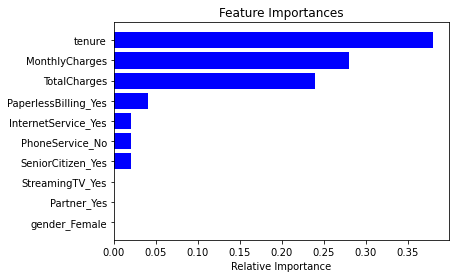

In [61]:

importances = ada.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [62]:
# save transformation pipeline and model 
save_model(ada, model_name = 'model.pkl')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('dummy', Dummify(target='Churn')),
                 ('fix_perfect', Remove_100(target='Churn')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs

# Deploy model on Tkinter

In [72]:
import tkinter as tk
from tkinter import *
# features MonthlyCharges, tenure, totalCharges, PaperlessBilling, InternetService, PhoneService, SenioCitizen

In [70]:
dt_saved = load_model('model.pkl')

Transformation Pipeline and Model Successfully Loaded


In [99]:
dt_saved

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Churn')),
                ('fix_perfect', Remove_100(target='Churn')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'),

In [75]:
df.head(2)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No


In [105]:
 dc = {'MonthlyCharges':[29.85],
              'tenure':[10],
              'TotalCharges':[1000],
              'PaperlessBilling':['Yes'],
              'InternetService':['Yes'],
              'PhoneService':['No'],
              'SeniorCitizen':['Yes'],
      'StreamingTV':['No'],
      'gender':['Male'],
      'Partner':['Yes']}
test=pd.DataFrame.from_dict(dc)
test

,MonthlyCharges,tenure,TotalCharges,PaperlessBilling,InternetService,PhoneService,SeniorCitizen,StreamingTV,gender,Partner
0,29.85,10,1000,Yes,Yes,No,Yes,No,Male,Yes


In [111]:
        
[*predict_model(dt_saved, data=test)['Label'].values][0]

'Yes'

In [114]:
dt_saved = load_model('model.pkl')
def predict():
    MonthlyCharges = inp1.get()
    tenure = inp2.get()
    totalCharges = inp3.get()
    PaperlessBilling = inp4.get()
    InternetService = inp5.get()
    PhoneService = inp6.get()
    SeniorCitizen = inp7.get()
    StreamingTV = inp8.get()
    gender = inp9.get()
    Partner = inp10.get()

    try:
        MonthlyCharges = float(MonthlyCharges)
        tenure = int(tenure)
        totalCharges = float(totalCharges)
        PaperlessBilling = str(PaperlessBilling)
        InternetService = str(InternetService)
        PhoneService = str(PhoneService)
        SeniorCitizen = str(SeniorCitizen)
        StreamingTV = str(StreamingTV)
        gender = str(gender)
        Partner = str(Partner)
        
        dc = {'MonthlyCharges':[MonthlyCharges],
              'tenure':[tenure],
              'TotalCharges':[totalCharges],
              'PaperlessBilling':[PaperlessBilling],
              'InternetService':[InternetService],
              'PhoneService':[PhoneService],
              'SeniorCitizen':[SeniorCitizen],
              'StreamingTV':[StreamingTV],
              'gender':[gender],
              'Partner':[Partner]}
        test=pd.DataFrame.from_dict(dc)
        
        lbl11['text'] = [*predict_model(dt_saved, data=test)['Label'].values][0]
        if lbl11['text'] == 'No':
            lbl11['text'] = 'No Churn'
        else: 
            lbl11['text'] = 'Churn'
    except ValueError:
        messagebox.showinfo("Alert Message", "Enter Properly, bro!") # this code to make alert messages when we wrong input data

Transformation Pipeline and Model Successfully Loaded


In [115]:

wdw = tk.Tk()
wdw.title("Simulation predict!") #mengubah nama jendela


#MonthlyCharges
inp1 = tk.Entry(wdw)
inp1.insert(0,'Numbers')
inp1.grid(row=1,column=1)
lbl1 = tk.Label(wdw, text="MonthlyCharges: ")
lbl1.grid(row=1,column=0)

#tenure
inp2 = tk.Entry(wdw)
inp2.insert(0,'Numbers')
inp2.grid(row=2,column=1)
lbl2 = tk.Label(wdw, text="tenure: ")
lbl2.grid(row=2,column=0)


#totalCharges
inp3 = tk.Entry(wdw)
inp3.insert(0,'Numbers')
inp3.grid(row=3,column=1)
lbl3 = tk.Label(wdw, text="totalCharges: ")
lbl3.grid(row=3,column=0)


#PaperlessBilling
inp4 = tk.Entry(wdw)
inp4.insert(0,'Yes or No')
inp4.grid(row=4,column=1)
lbl4 = tk.Label(wdw, text="PaperlessBilling: ")
lbl4.grid(row=4,column=0)


#InternetService
inp5 = tk.Entry(wdw)
inp5.insert(0,'Yes or No')
inp5.grid(row=5,column=1)
lbl5 = tk.Label(wdw, text="InternetService: ")
lbl5.grid(row=5,column=0)


#PhoneService
inp6 = tk.Entry(wdw)
inp6.insert(0,'Yes or No')
inp6.grid(row=6,column=1)
lbl6 = tk.Label(wdw, text="PhoneService: ")
lbl6.grid(row=6,column=0)

#SeniorCitizen
inp7 = tk.Entry(wdw)
inp7.insert(0,'Yes or No')
inp7.grid(row=7,column=1)
lbl7 = tk.Label(wdw, text="SeniorCitizen: ")
lbl7.grid(row=7,column=0)

#StreamingTV
inp8 = tk.Entry(wdw)
inp8.insert(0,'Yes or No')
inp8.grid(row=8,column=1)
lbl8 = tk.Label(wdw, text="StreamingTV: ")
lbl8.grid(row=8,column=0)


#gender
inp9 = tk.Entry(wdw)
inp9.insert(0,'Male or Female')
inp9.grid(row=9,column=1)
lbl9 = tk.Label(wdw, text="gender: ")
lbl9.grid(row=9,column=0)

#Partner
inp10 = tk.Entry(wdw)
inp10.insert(0,'Yes or No')
inp10.grid(row=10,column=1)
lbl10 = tk.Label(wdw, text="Partner: ")
lbl10.grid(row=10,column=0)


btn = tk.Button(wdw, text = "Click to predict!", command=predict)
btn.grid(row=12,columnspan=2)
lbl11 = tk.Label(wdw, text="Result ...")
lbl11.grid(row=11,columnspan=2)

wdw.mainloop()
